In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3 * x**2 - 4*x +5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

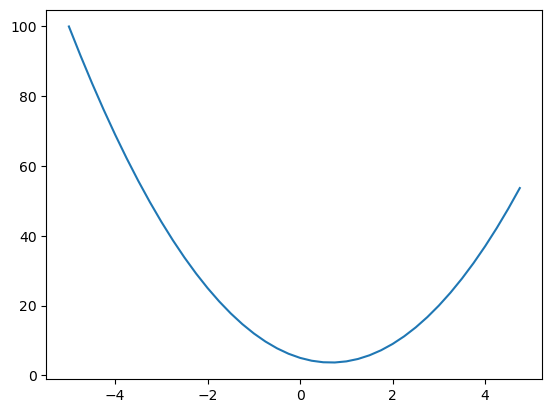

In [5]:
plt.plot(xs,ys)

In [6]:
h =0.001
x = 3
f(x+h)


20.014003000000002

In [7]:
f(x+h)-f(x)

0.01400300000000243

In [8]:
#gradient
(f(x+h)-f(x))/h

14.00300000000243

In [9]:
h =0.001
x = -4
(f(x+h)-f(x))/h

-27.99699999999916

In [10]:
#multivariate function
a=2.0
b=--3.0
c =10.0
d1 = a*b+c
a+= h
d2 = a*b+c
print('d1', d1)
print('d2', d2)
print("Slope ", (d2-d1)/h)

d1 16.0
d2 16.003
Slope  3.0000000000001137


In [11]:
b+= h
d2 = a*b+c
print('d1', d1)
print('d2', d2)
print("Slope ", (d2-d1)/h)

d1 16.0
d2 16.005001
Slope  5.001000000000033


In [28]:
class Value:
    def __init__(self, data,_children =(), _op = '', label = '' ):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f'Value(data = {self.data})'
    
    def __add__(self, other):
        out = Value(self.data+other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data* other.data, (self, other), "*")
        return out
    
    def tanh(self):
        x= self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        return out

In [29]:
a= Value(2.0)
b = Value(-3.0)
c = Value(10.0)

In [30]:
d = a*b+c
d


Value(data = 4.0)

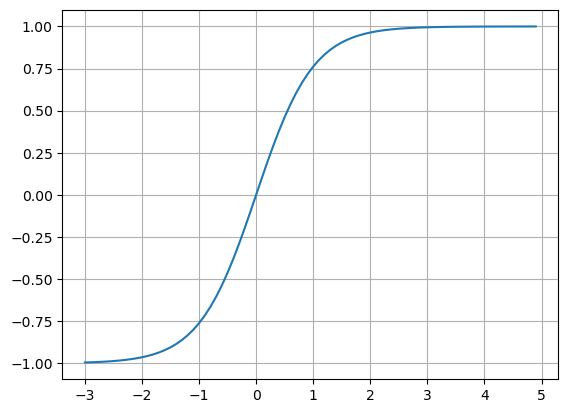

In [31]:
plt.plot(np.arange(-3,5,0.1), np.tanh(np.arange(-3,5,0.1)))
plt.grid()

In [ ]:
#inupts
x1 = Value(2.0, label = 'x1')
x2 = Value(0,0, label = 'x2')
#weights
w1= Value(-3.0, label = 'w1')
w2= Value(1.0, label = 'w2')
#bias
b= Value(5.0, label = 'b')

x1w1 = x1*w1 
x1w1.label = 'x1w1'
x2w2 = x2*w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2
x1w1x2w2.label = 'x1w1+x2w2'

n = x1w1+x2w2+b
n.label = 'n'

o = n.tanh()
